In [2]:
import numpy as np
import json
from pprint import pprint
import matplotlib.pyplot as plt
from collections import defaultdict

plt.rcParams['figure.figsize'] = [16, 68]
from plot_utils import *

# Timeline

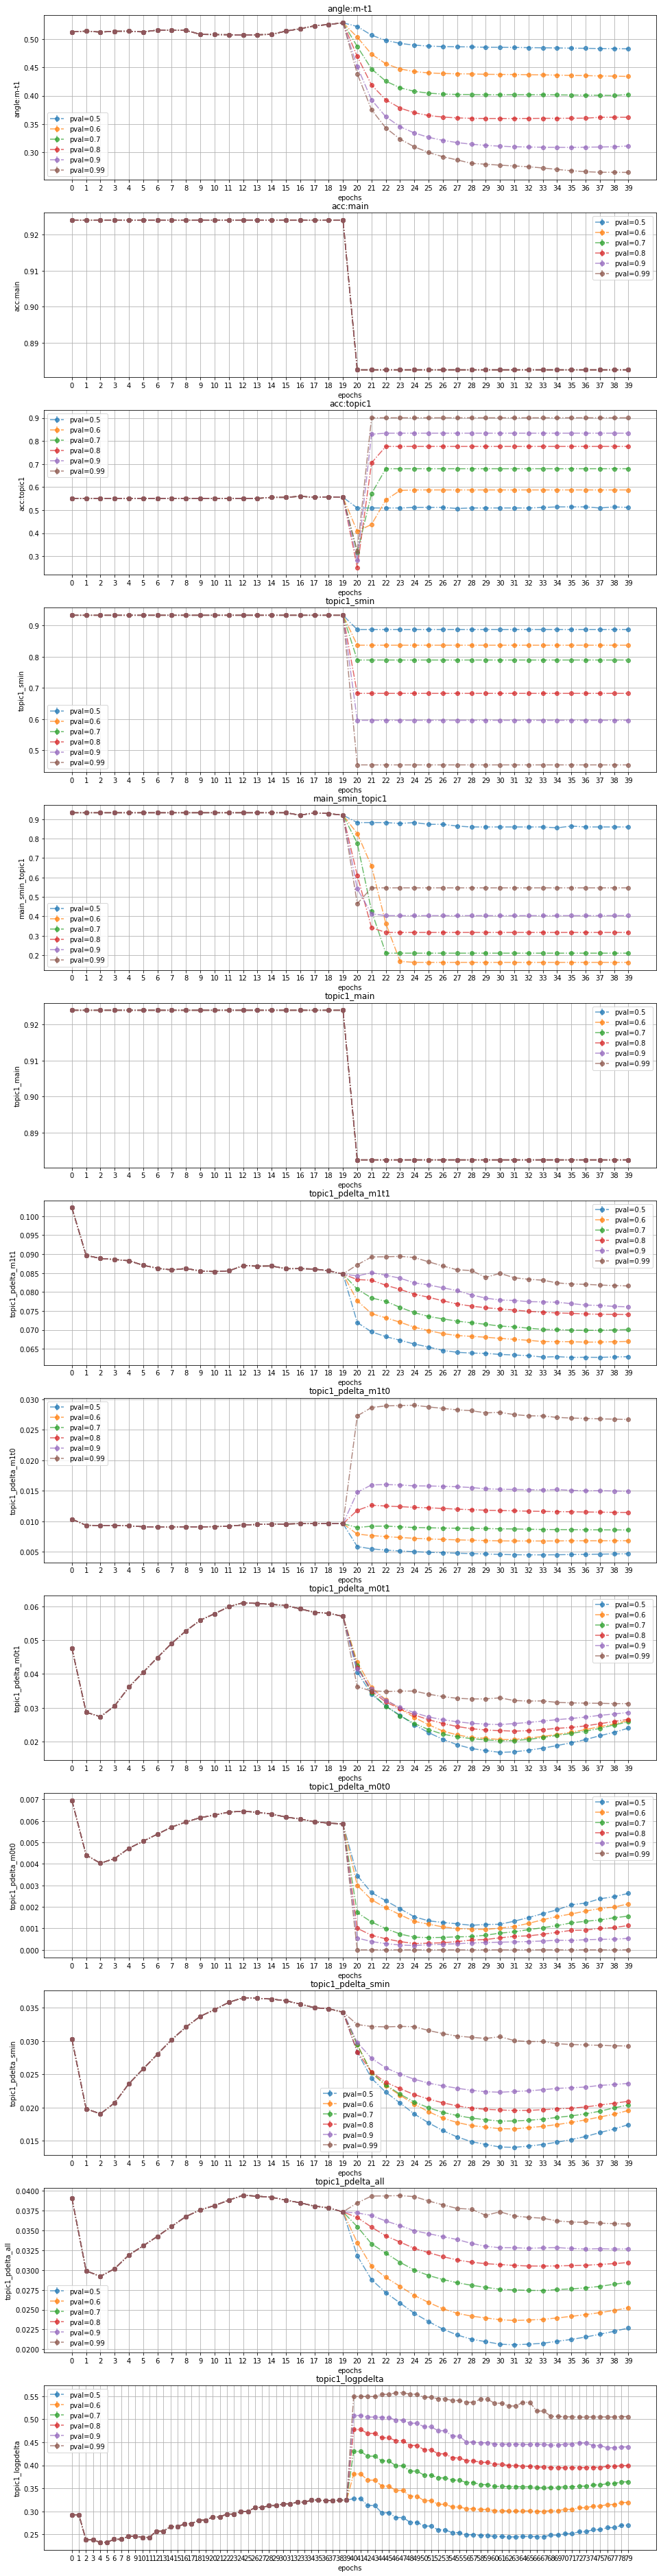

In [19]:
run_list=[1,]
pval_list=[0.5,0.6,0.7,0.8,0.9,0.99]
plot_item_list = [
                    "angle:m-t1",
                    "acc:main",
                    "acc:topic1",
                    "topic1_smin",
                    "main_smin_topic1",
                    "topic1_main",
                    "topic1_pdelta_m1t1",
                    "topic1_pdelta_m1t0",
                    "topic1_pdelta_m0t1",
                    "topic1_pdelta_m0t0",
                    "topic1_pdelta_smin",
                    "topic1_pdelta_all",
                    "topic1_logpdelta",
]


ax=None

#Other hyperparam
dataset="nlp_toy2"
lt="x_entropy"
neg1_fmethod="remove_negation"
drate=0.0
l2=0.0
hretrain="no_warm_encoder"
d="non_causal"
n=0.1
h=1


model_type="nbow"
remmode="adversarial"
adv_rm_method="adv_rm_with_main"
grstrength="0.1" #is not being used in the above adv_rm_mode (so our results are also meaningless previously wrt to this)
advepoch=20
s=1000


all_result_dict = get_all_result_timeline(run_list=run_list,
                                      pval_list=pval_list,
                                      fname_pattern="dataset/{}/nlp_logs/pt.rel.mt({}).neg1_fmethod({}).remmode({}).adv_rm_method({}).grstrength({}).advepoch({}).lt({}).drate({}).l2({}).n({}).h({}).s({}).p({}).r({})/probe_metric_list.json".format(
                                                                              dataset,
                                                                              model_type,
                                                                              neg1_fmethod,
                                                                              remmode,
                                                                              adv_rm_method,
                                                                              grstrength,
                                                                              advepoch,
                                                                              lt,
                                                                              drate,
                                                                              l2,
                                                                              n,
                                                                              h,
                                                                              s,
                                                                              "{}",
                                                                              "{}",
                                      )
)
plot_one_timeline(pval_list,all_result_dict,plot_item_list)

# Variation with Samples

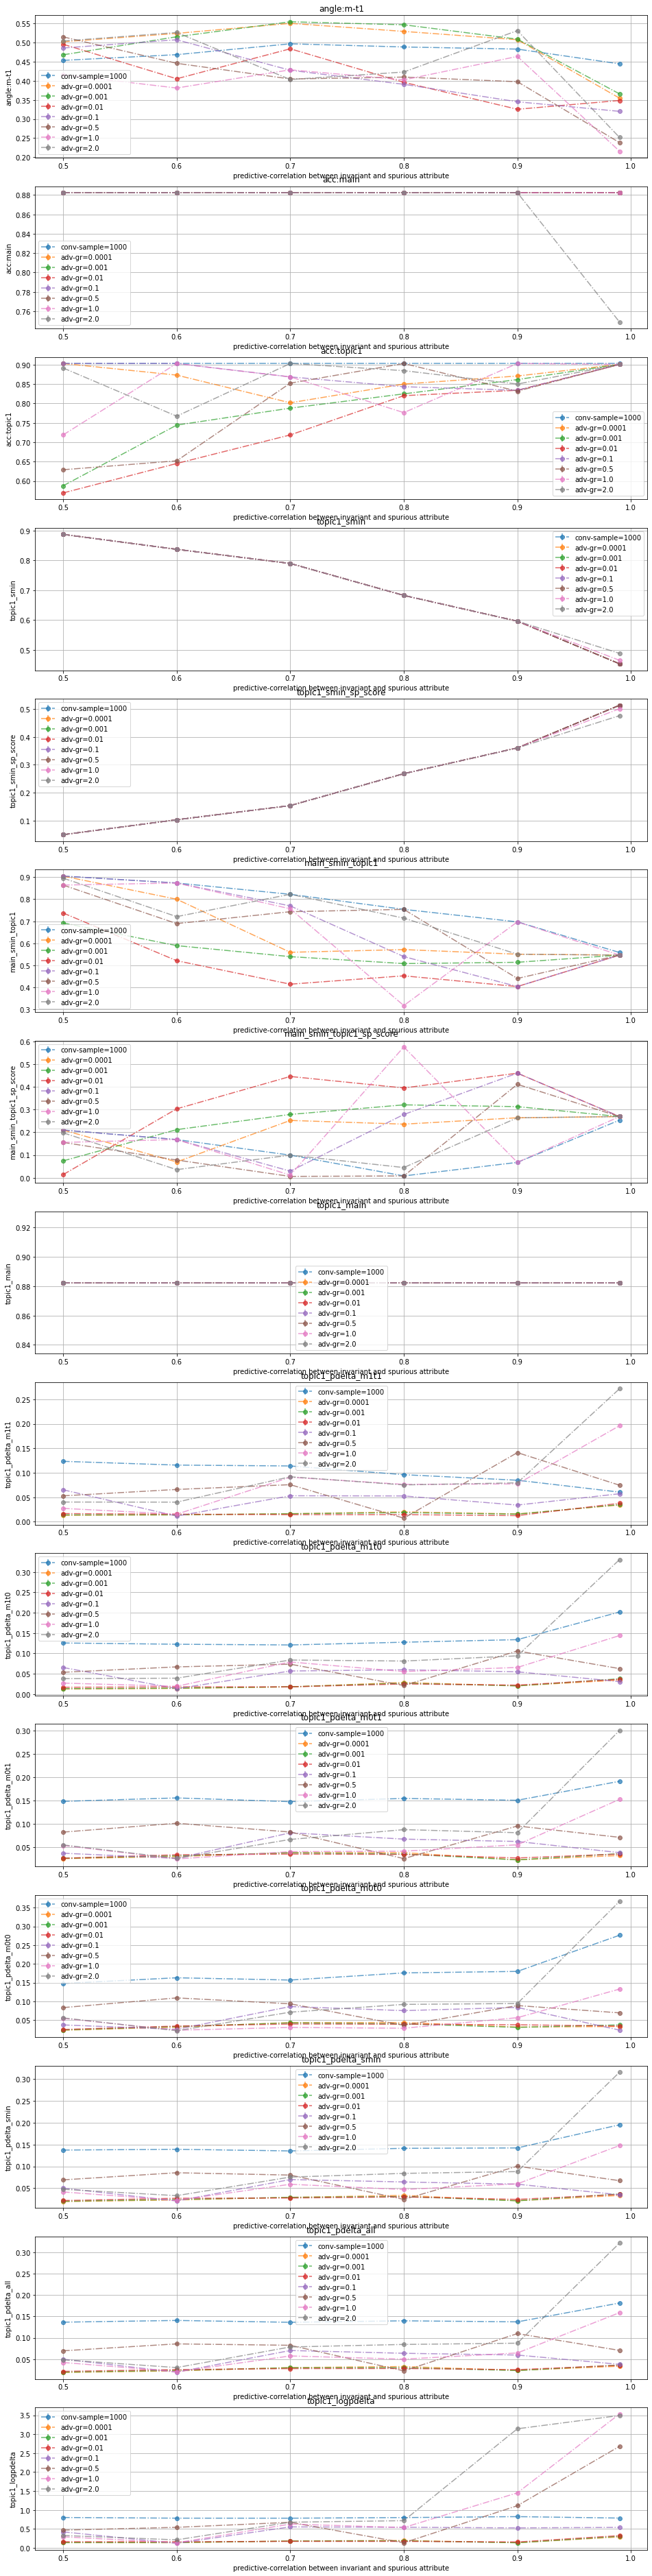

'\nAs the correlation is increasing the number of samples of minoroty group is also decreasing.\nSo, is the average minority group accuracy estimate good enough?\n'

In [36]:
run_list=[1,]
pval_list=[0.5,0.6,0.7,0.8,0.9,0.99]
plot_item_list = [
                    "angle:m-t1",
                    "acc:main",
                    "acc:topic1",
                    "topic1_smin",
                    "main_smin_topic1",
                    "topic1_main",
                    "topic1_pdelta_m1t1",
                    "topic1_pdelta_m1t0",
                    "topic1_pdelta_m0t1",
                    "topic1_pdelta_m0t0",
                    "topic1_pdelta_smin",
                    "topic1_pdelta_all",
                    "topic1_logpdelta"
]


ax=None


#Getting the clean classifier's smin accuracy
lt="x_entropy"
drate=0.0
l2=0.0
hretrain="no_warm_encoder"
mainmode="causal_same_sp" #causal_same_sp, causal_rebalance_sp
n=0.1
h=0
mainepoch=20
s=1000
model_type="nbow"
remmode="null_space"
advepoch=20
topicepoch=10
neg1_flip_method="remove_negation"
dataset = "nlp_toy2" # "multinli_1.0", "twitter_pan16_mention_gender" , "twitter_aae_sentiment_race"

all_result_dict = get_all_result_dict(run_list=run_list,
                                      pval_list=pval_list,
                                      enum=mainepoch,
                                      fname_pattern="dataset/{}/nlp_logs/pt.rel.mt({}).neg1_fmethod({}).remmode({}).mainmode({}).advepoch({}).topicepoch({}).lt({}).drate({}).l2({}).n({}).h({}).s({}).e({}).p({}).r({})/probe_metric_list.json".format(
                                                                              dataset,
                                                                              model_type,
                                                                              neg1_flip_method,
                                                                              remmode,
                                                                              mainmode,
                                                                              advepoch,
                                                                              topicepoch,
                                                                              lt,
                                                                              drate,
                                                                              l2,
                                                                              n,
                                                                              h,
                                                                              s,
                                                                              mainepoch,
                                                                              "{}",
                                                                              "{}",
                                      )
)
#Now getting the smin acc from this clean classifier
clean_pval=0.5
clean_smin_acc_list_dict=dict(
            topic1_smin=all_result_dict[clean_pval]["topic1_smin"]["val_list"],
            main_smin_topic1=all_result_dict[clean_pval]["main_smin_topic1"]["val_list"]
)



plot_item_list = [
                    "angle:m-t1",
                    "acc:main",
                    "acc:topic1",
                    "topic1_smin",
                    "topic1_smin_sp_score",
                    "main_smin_topic1",
                    "main_smin_topic1_sp_score",
                    "topic1_main",
                    "topic1_pdelta_m1t1",
                    "topic1_pdelta_m1t0",
                    "topic1_pdelta_m0t1",
                    "topic1_pdelta_m0t0",
                    "topic1_pdelta_smin",
                    "topic1_pdelta_all",
                    "topic1_logpdelta",
]
#Plotting the convergence result first to see the conparison
d="non_causal"
e=20
h=0

all_result_dict = get_all_result_dict(run_list=run_list,
                                      pval_list=pval_list,
                                      enum=e,
                                      fname_pattern="dataset/{}/nlp_logs/pt.rel.model_type({}).neg1_fmethod({}).lt({}).dropout_rate({}).l2({}).noise({}).hlayer({}).sample({}).epoch({}).pval({}).rnum({})/probe_metric_list.json".format(
                                                                              dataset,
                                                                              model_type,
                                                                              neg1_flip_method,
                                                                              lt,
                                                                              drate,
                                                                              l2,
                                                                              n,
                                                                              h,
                                                                              s,
                                                                              e,
                                                                              "{}",
                                                                              "{}",
                                      ),
                                      clean_smin_acc_list_dict=clean_smin_acc_list_dict,                                     
)
ax = plot_all_results(ax,pval_list,all_result_dict,plot_item_list,extra_label="conv-sample={}".format(s))




#Other hyperparam
# run_list=[1,2,3]
remmode="adversarial"
adv_rm_method="adv_rm_with_main"
grstrength=0.01
advepoch=20
neg1_flip_method="remove_negation"
s = 1000
h=1
# 0.00001,0.0001,0.001,0.01,0.1,0.5,1.0,2.0
for grstrength in ["0.0001","0.001","0.01","0.1","0.5","1.0","2.0"]:
    all_result_dict = get_all_result_dict(run_list=run_list,
                                          pval_list=pval_list,
                                          enum=advepoch,
                                          fname_pattern="dataset/{}/nlp_logs/pt.rel.mt({}).neg1_fmethod({}).remmode({}).adv_rm_method({}).grstrength({}).advepoch({}).lt({}).drate({}).l2({}).n({}).h({}).s({}).p({}).r({})/probe_metric_list.json".format(
                                                                              dataset,
                                                                              model_type,
                                                                              neg1_flip_method,
                                                                              remmode,
                                                                              adv_rm_method,
                                                                              grstrength,
                                                                              advepoch,
                                                                              lt,
                                                                              drate,
                                                                              l2,
                                                                              n,
                                                                              h,
                                                                              s,
                                                                              "{}",
                                                                              "{}",
                                          ),
                                          clean_smin_acc_list_dict=clean_smin_acc_list_dict,
                                        
    )
    ax = plot_all_results(ax,pval_list,all_result_dict,plot_item_list,extra_label="adv-gr={}".format(grstrength))


plt.show()


'''
As the correlation is increasing the number of samples of minoroty group is also decreasing.
So, is the average minority group accuracy estimate good enough?
'''

# Variation with Parameters

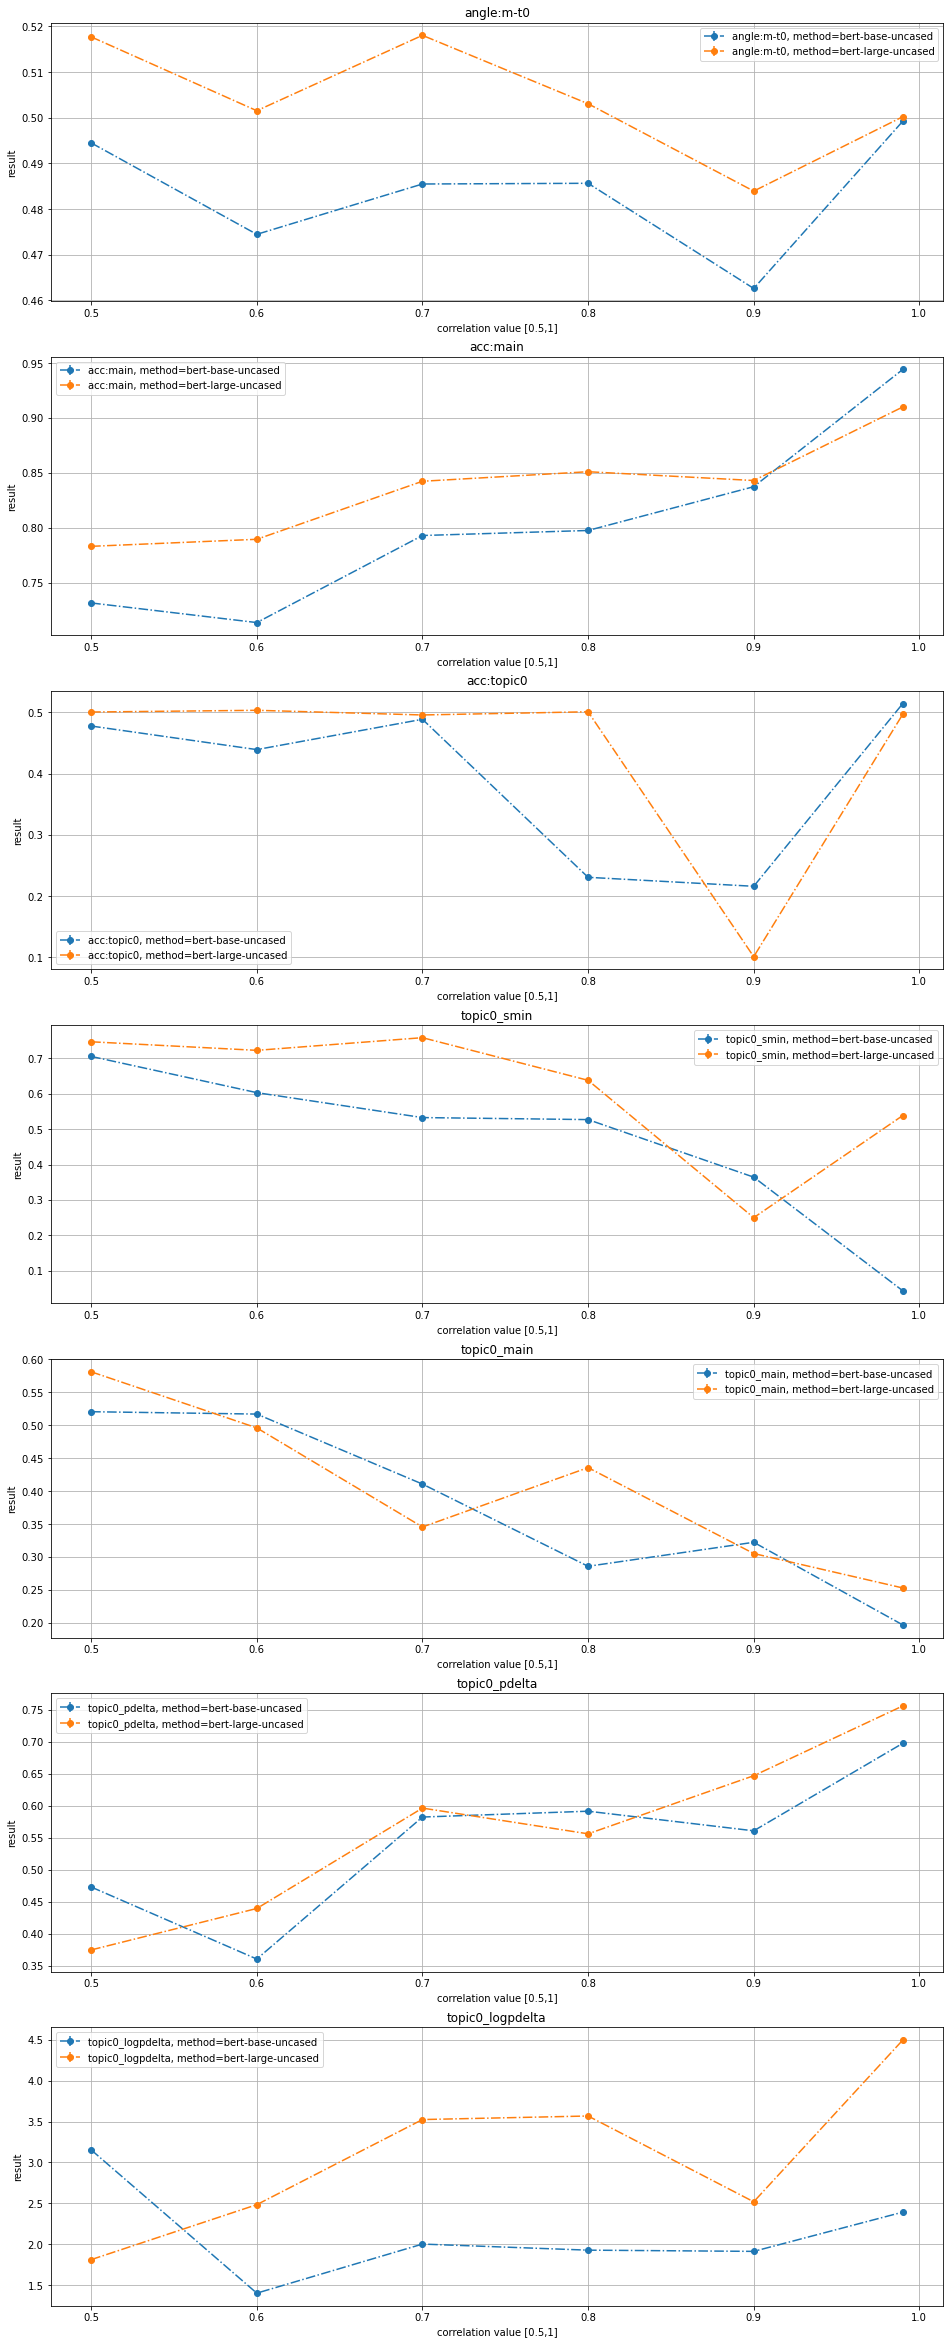

'\nAs the correlation is increasing the number of samples of minoroty group is also decreasing.\nSo, is the average minority group accuracy estimate good enough?\n'

In [13]:
run_list=[0,]
pval_list=[0.5,0.6,0.7,0.8,0.9,0.99]
plot_item_list = [
                    "angle:m-t0",
                    "acc:main",
                    "acc:topic0",
                    "topic0_smin",
                    "topic0_main",
                    "topic0_pdelta",
                    "topic0_logpdelta"
]


ax=None

#Other hyperparam
model_type="bert-base-uncased"
lt="x_entropy"
drate=0.0
l2=0.0
hretrain="no_warm_encoder"
d="non_causal"
n=0.0
h=0
remmode="adversarial"
adv_rm_method="adv_rm_with_main"
grstrength=1.0
advepoch=5
s=10000

for model_type in ["bert-base-uncased","bert-large-uncased"]:
    all_result_dict = get_all_result_dict(run_list=run_list,
                                          pval_list=pval_list,
                                          enum=advepoch,
                                          fname_pattern="nlp_logs/pt.rel.model_type({}).remmode({}).adv_rm_method({}).grstrength({}).advepoch({}).lt({}).dropout_rate({}).l2({}).hretrain({}).noise({}).hlayer({}).sample({}).p({}).run({})/probe_metric_list.json".format(
                                                                                  model_type,
                                                                                  remmode,
                                                                                  adv_rm_method,
                                                                                  grstrength,
                                                                                  advepoch,
                                                                                  lt,
                                                                                  drate,
                                                                                  l2,
                                                                                  hretrain,
                                                                                  n,
                                                                                  h,
                                                                                  s,
                                                                                  "{}",
                                                                                  "{}",
                                          )
    )
    ax = plot_all_results(ax,pval_list,all_result_dict,plot_item_list,extra_label=", method={}".format(model_type))


plt.show()


'''
As the correlation is increasing the number of samples of minoroty group is also decreasing.
So, is the average minority group accuracy estimate good enough?
'''

# Variation with noise

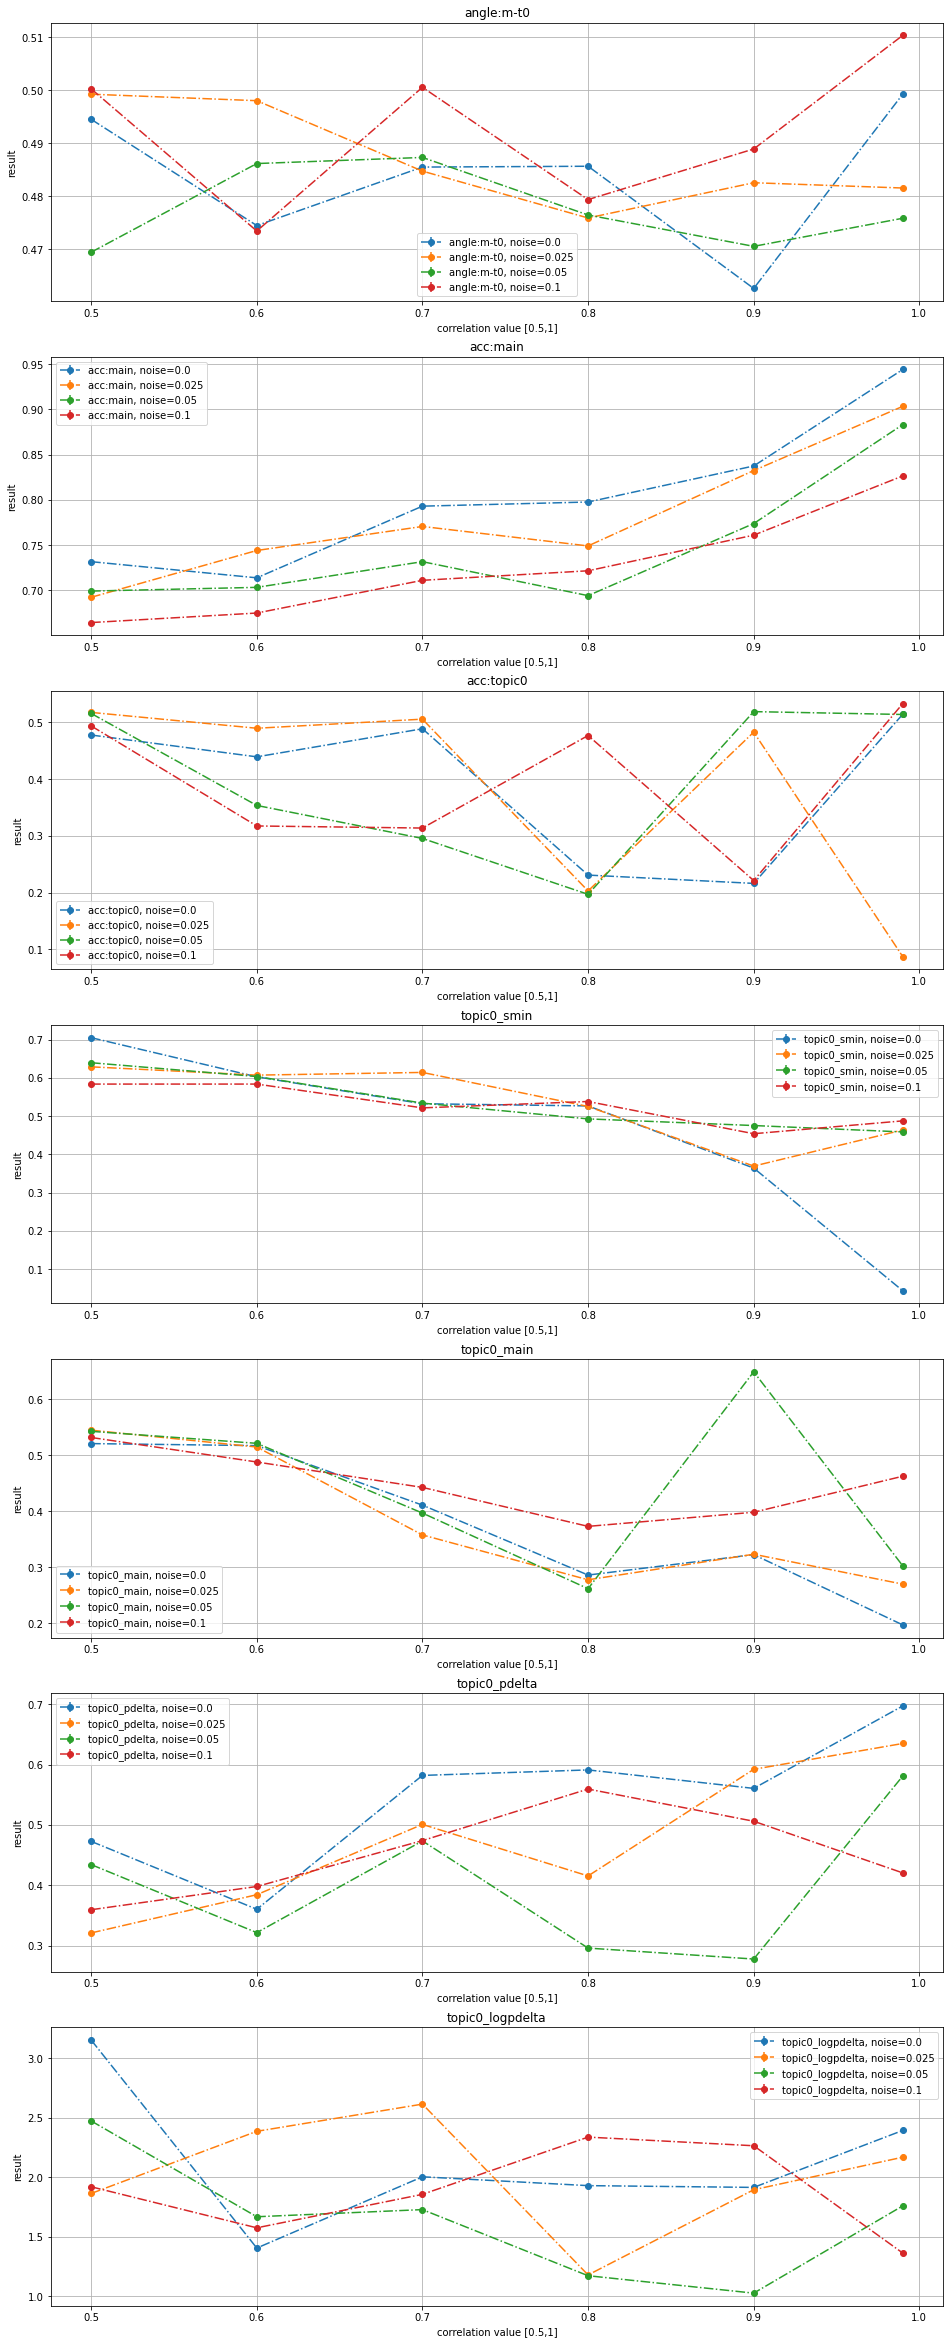

'\nAs the correlation is increasing the number of samples of minoroty group is also decreasing.\nSo, is the average minority group accuracy estimate good enough?\n'

In [15]:
run_list=[0,]
pval_list=[0.5,0.6,0.7,0.8,0.9,0.99]
plot_item_list = [
                    "angle:m-t0",
                    "acc:main",
                    "acc:topic0",
                    "topic0_smin",
                    "topic0_main",
                    "topic0_pdelta",
                    "topic0_logpdelta"
]


ax=None

#Other hyperparam
model_type="bert-base-uncased"
lt="x_entropy"
drate=0.0
l2=0.0
hretrain="no_warm_encoder"
d="non_causal"
n=0.0
h=0
remmode="adversarial"
adv_rm_method="adv_rm_with_main"
grstrength=1.0
advepoch=5
s=10000

for n in [0.0,0.025,0.05,0.1]:
    all_result_dict = get_all_result_dict(run_list=run_list,
                                          pval_list=pval_list,
                                          enum=advepoch,
                                          fname_pattern="nlp_logs/pt.rel.model_type({}).remmode({}).adv_rm_method({}).grstrength({}).advepoch({}).lt({}).dropout_rate({}).l2({}).hretrain({}).noise({}).hlayer({}).sample({}).p({}).run({})/probe_metric_list.json".format(
                                                                                  model_type,
                                                                                  remmode,
                                                                                  adv_rm_method,
                                                                                  grstrength,
                                                                                  advepoch,
                                                                                  lt,
                                                                                  drate,
                                                                                  l2,
                                                                                  hretrain,
                                                                                  n,
                                                                                  h,
                                                                                  s,
                                                                                  "{}",
                                                                                  "{}",
                                          )
    )
    ax = plot_all_results(ax,pval_list,all_result_dict,plot_item_list,extra_label=", noise={}".format(n))


plt.show()


'''
As the correlation is increasing the number of samples of minoroty group is also decreasing.
So, is the average minority group accuracy estimate good enough?
'''

# Variation with epochs

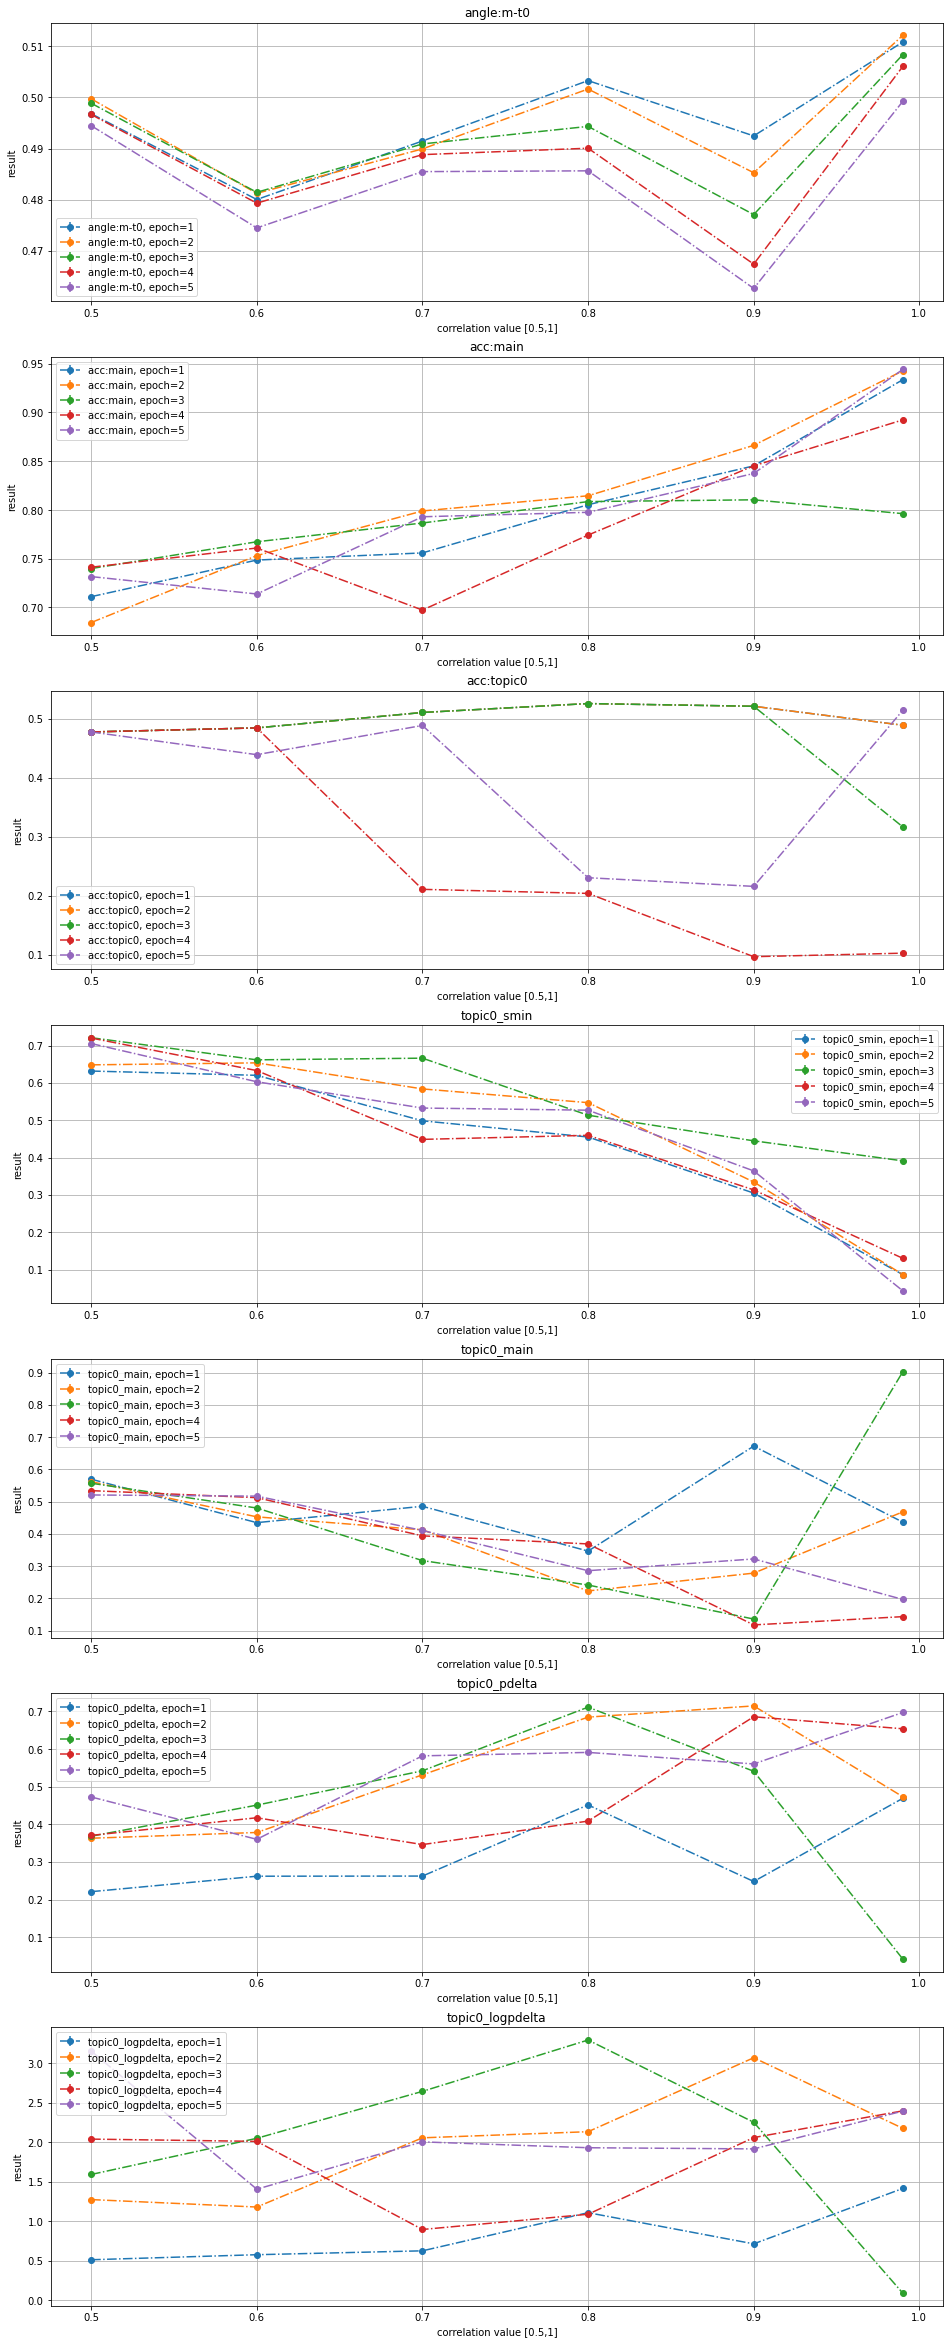

'\nAs the correlation is increasing the number of samples of minoroty group is also decreasing.\nSo, is the average minority group accuracy estimate good enough?\n'

In [17]:
run_list=[0,]
pval_list=[0.5,0.6,0.7,0.8,0.9,0.99]
plot_item_list = [
                    "angle:m-t0",
                    "acc:main",
                    "acc:topic0",
                    "topic0_smin",
                    "topic0_main",
                    "topic0_pdelta",
                    "topic0_logpdelta"
]


ax=None

#Other hyperparam
model_type="bert-base-uncased"
lt="x_entropy"
drate=0.0
l2=0.0
hretrain="no_warm_encoder"
d="non_causal"
n=0.0
h=0
remmode="adversarial"
adv_rm_method="adv_rm_with_main"
grstrength=1.0
advepoch=5
s=10000

for advepoch_num in [1,2,3,4,5]:
    all_result_dict = get_all_result_dict(run_list=run_list,
                                          pval_list=pval_list,
                                          enum=advepoch_num,
                                          fname_pattern="nlp_logs/pt.rel.model_type({}).remmode({}).adv_rm_method({}).grstrength({}).advepoch({}).lt({}).dropout_rate({}).l2({}).hretrain({}).noise({}).hlayer({}).sample({}).p({}).run({})/probe_metric_list.json".format(
                                                                                  model_type,
                                                                                  remmode,
                                                                                  adv_rm_method,
                                                                                  grstrength,
                                                                                  advepoch,
                                                                                  lt,
                                                                                  drate,
                                                                                  l2,
                                                                                  hretrain,
                                                                                  n,
                                                                                  h,
                                                                                  s,
                                                                                  "{}",
                                                                                  "{}",
                                          )
    )
    ax = plot_all_results(ax,pval_list,all_result_dict,plot_item_list,extra_label=", epoch={}".format(advepoch_num))


plt.show()


'''
As the correlation is increasing the number of samples of minoroty group is also decreasing.
So, is the average minority group accuracy estimate good enough?
'''

# Variation with GR-Strength

FileNotFoundError: [Errno 2] No such file or directory: 'dataset/multinli_1.0/nlp_logs/pt.rel.mt(roberta-base).neg1_fmethod(remove_negation).remmode(adversarial).adv_rm_method(adv_rm_with_main).grstrength(0.0).advepoch(20).lt(x_entropy).drate(0.0).l2(0.0).n(0.0).h(0).s(10000).p(0.5).r(1)/probe_metric_list.json'

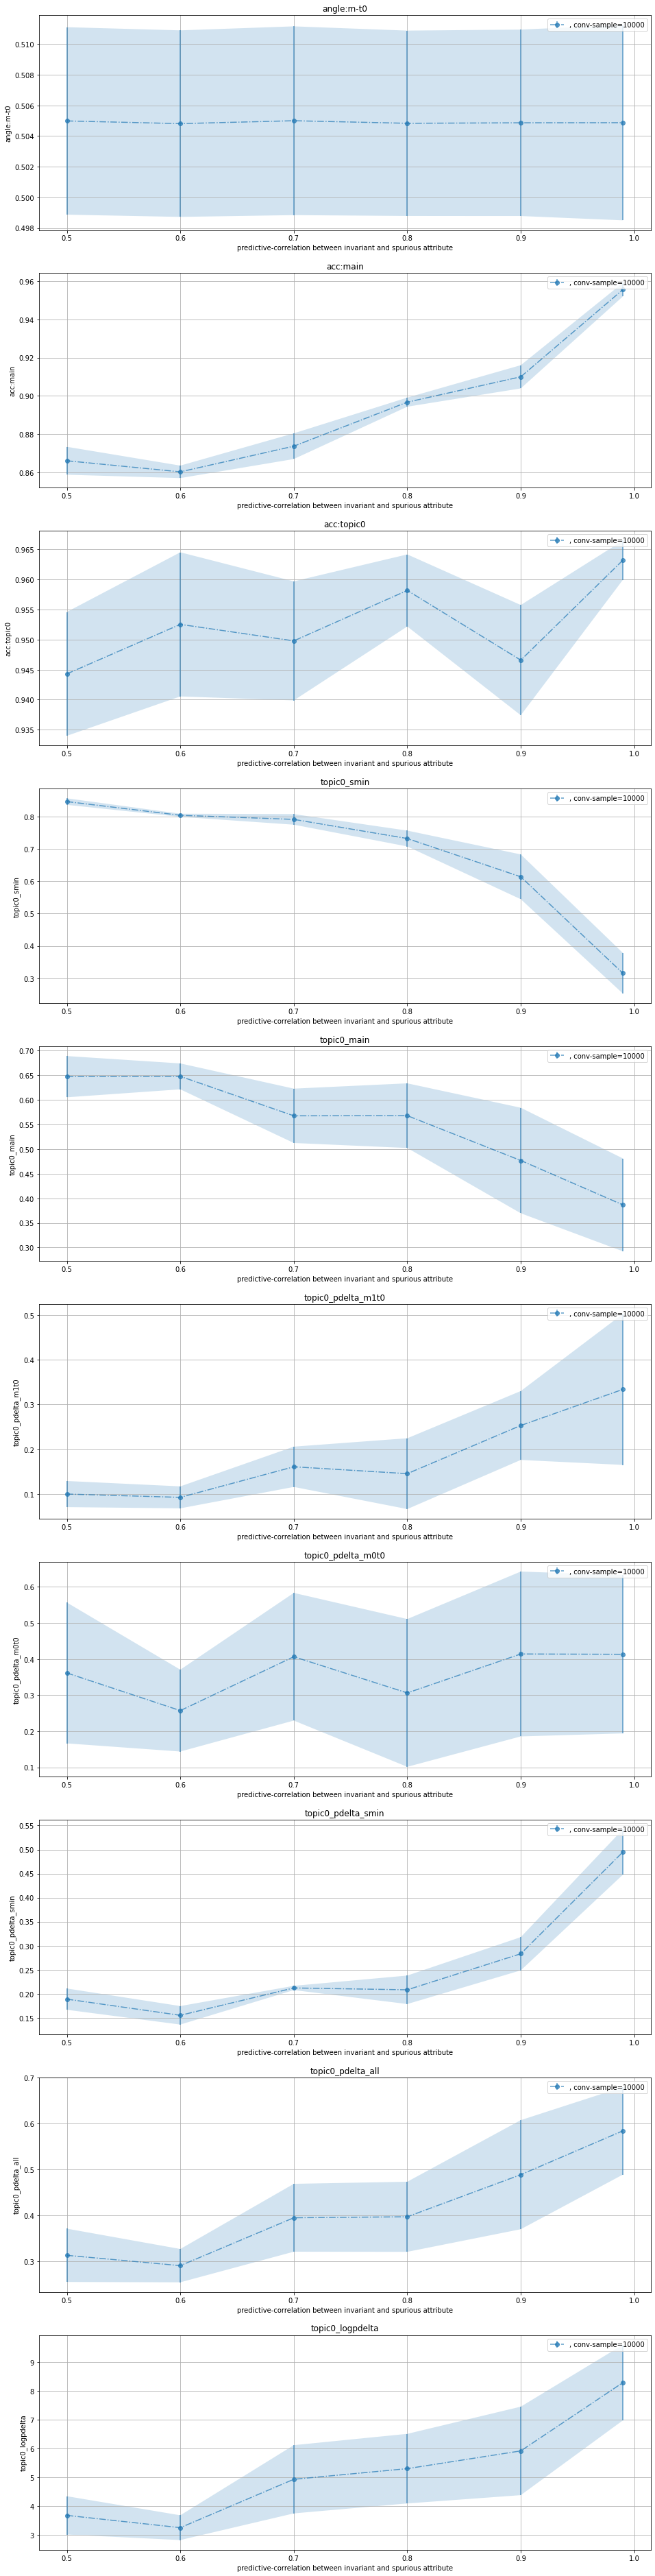

In [6]:
run_list=[1,2,3]
pval_list=[0.5,0.6,0.7,0.8,0.9,0.99]
plot_item_list = [
                    "angle:m-t0",
                    "acc:main",
                    "acc:topic0",
                    "topic0_smin",
                    "topic0_main",
                    "topic0_pdelta_m1t0",
                    "topic0_pdelta_m0t0",
                    "topic0_pdelta_smin",
                    "topic0_pdelta_all",
                    "topic0_logpdelta"
]


ax=None
#Plotting the convergence result first to see the conparison
model_type="roberta-base"
lt="x_entropy"
drate=0.0
l2=0.0
hretrain="no_warm_encoder"
d="non_causal"
n=0.0
h=0
e=20
s=10000
neg1_flip_method="remove_negation"
all_result_dict = get_all_result_dict(run_list=run_list,
                                      pval_list=pval_list,
                                      enum=e,
                                      fname_pattern="dataset/multinli_1.0/nlp_logs/pt.rel.model_type({}).neg1_fmethod({}).lt({}).dropout_rate({}).l2({}).noise({}).hlayer({}).sample({}).epoch({}).pval({}).rnum({})/probe_metric_list.json".format(
                                                                              model_type,
                                                                              neg1_flip_method,
                                                                              lt,
                                                                              drate,
                                                                              l2,
                                                                              n,
                                                                              h,
                                                                              s,
                                                                              e,
                                                                              "{}",
                                                                              "{}",
                                      )
)
ax = plot_all_results(ax,pval_list,all_result_dict,plot_item_list,extra_label=", conv-sample={}".format(s))




#Other hyperparam
# model_type="roberta-base"
lt="x_entropy"
drate=0.0
l2=0.0
hretrain="no_warm_encoder"
d="non_causal"
n=0.0
h=0
remmode="adversarial"
adv_rm_method="adv_rm_with_main"
grstrength=1.0
advepoch=20
advepoch_num=advepoch
s=1000

#"0.01","0.1","0.3","0.5","0.7","0.9","1.0","2.0","4.0","8.0"

for grstrength in [0.0,0.0001,0.001,0.01,0.1,0.5,1.0,10.0]:
    all_result_dict = get_all_result_dict(run_list=run_list,
                                          pval_list=pval_list,
                                          enum=advepoch_num,
                                          fname_pattern="dataset/multinli_1.0/nlp_logs/pt.rel.mt({}).neg1_fmethod({}).remmode({}).adv_rm_method({}).grstrength({}).advepoch({}).lt({}).drate({}).l2({}).n({}).h({}).s({}).p({}).r({})/probe_metric_list.json".format(
                                                                              model_type,
                                                                              neg1_fmethod,
                                                                              remmode,
                                                                              adv_rm_method,
                                                                              grstrength,
                                                                              advepoch,
                                                                              lt,
                                                                              drate,
                                                                              l2,
                                                                              n,
                                                                              h,
                                                                              s,
                                                                              "{}",
                                                                              "{}",
                                      )
    )
    ax = plot_all_results(ax,pval_list,all_result_dict,plot_item_list,extra_label=", adv-GR={}".format(grstrength))


plt.show()


'''
As the correlation is increasing the number of samples of minoroty group is also decreasing.
So, is the average minority group accuracy estimate good enough?
'''